In [2]:
#importing packages
import numpy as np
import pandas as pd
import re,string
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
import pickle as pk
import nltk
import seaborn as sns
nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
df = pd.read_csv('netflix_reviews.csv', usecols = ["userName","content","score","thumbsUpCount"])
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108837 entries, 0 to 108837
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   userName       108837 non-null  object
 1   content        108837 non-null  object
 2   score          108837 non-null  int64 
 3   thumbsUpCount  108837 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 4.2+ MB


<Axes: xlabel='score'>

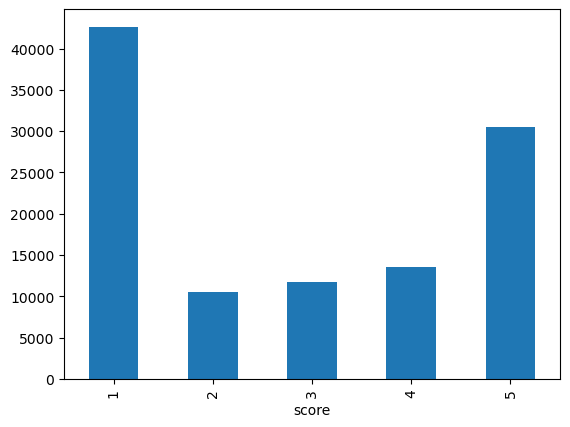

In [17]:
df.groupby('score').size().plot.bar()

In [26]:
# df.groupby('thumbsUpCount').size().plot.bar()

df['thumbsUpCount'].value_counts()

thumbsUpCount
0       74049
1       14368
2        5184
3        2778
4        1659
        ...  
1172        1
542         1
536         1
459         1
697         1
Name: count, Length: 899, dtype: int64

In [30]:
Data = df[df['thumbsUpCount']>10]
Data.tail(20)

,userName,content,score,thumbsUpCount
96467,A Google user,over the last years i have not had a prob but ...,1,22
96882,LuLu Beans,Charging more for less,1,11
96945,Minhaj Syed,"Awesome video Quality and Sound, great content...",5,15
97826,A Google user,I love the downloading option that way i can w...,5,48
98627,LJ G,"Great shows, comedy, movies, etc. Updated alot.",5,88
98987,Drishti Chauhan,Amazing app interface with incomparable content.,5,12
99004,Tarun Kumar Patre,Give option to go 30sec back even on the mobil...,4,11
99353,A Google user,I honestly Love Netflix you can watch movies T...,5,55
99954,A Google user,Please add more episodes for young justice sea...,4,26
100180,A Google user,It needs to have more movies but it's on the r...,4,13


In [36]:
data= df.copy()
data = data.drop(['userName'],axis =1)
data

,content,score,thumbsUpCount
0,Hep me,1,0
1,"Good cuality,and good service, thank you",5,0
2,Nice,5,0
3,Good,5,0
4,"Its nice app, but their is not game of thrones...",3,0
...,...,...,...
108833,i really like it! there are so many movies and...,5,0
108834,I love Netflix. I always enjoy my time using it.,5,0
108835,Sound quality is very slow of movies,1,0
108836,Rate is very expensive.. bcos we see netflix s...,1,0


In [37]:
#stop words
nltk.download('stopwords')
words = stopwords.words("english")

#defining stemmer function
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
# Doing all cleaning process using regex, stemmer, stopwords for all data
data['content'] = [re.sub("[^a-zA-Z]", " ",i).lower() for i in data['content']]
data['cleaned'] = data['content'].apply(lambda x: " ".join([stemmer.stem(i) for i in x.lower().split()]))
data

,content,score,thumbsUpCount,cleaned
0,hep me,1,0,hep me
1,good cuality and good service thank you,5,0,good cualiti and good servic thank you
2,nice,5,0,nice
3,good,5,0,good
4,its nice app but their is not game of thrones...,3,0,it nice app but their is not game of throne an...
...,...,...,...,...
108833,i really like it there are so many movies and...,5,0,i realli like it there are so mani movi and kd...
108834,i love netflix i always enjoy my time using it,5,0,i love netflix i alway enjoy my time use it
108835,sound quality is very slow of movies,1,0,sound qualiti is veri slow of movi
108836,rate is very expensive bcos we see netflix s...,1,0,rate is veri expens bco we see netflix sunday ...


In [39]:
data.to_csv("cleaned.csv")

In [3]:
df1 = pd.read_csv('cleaned.csv', encoding = 'latin1', usecols = ['cleaned','score'])
df1 = df1.sample(frac =1)
df1

,score,cleaned
46366,5,netflix is awesom i love that i can download m...
49748,3,there is a lag in audio after everi minut or s...
36252,1,i wish i could get more dub anim i subscrib to...
71750,4,cool tv show and movi but the episod keep on r...
48533,4,thi app is great there is no advert but one th...
...,...,...
82200,1,i wa sign up and it said that my phone number ...
89248,3,netflix is not accept payment with rupay debit...
68343,5,well it is a great app i use it on my phone la...
107054,5,if u love movi n english movi thi is the best ...


In [4]:
df1['score'] = df1['score'].astype('str')
df1['score'] = df1['score'].replace({'2':'1','3':'1','4':'5'})
df1 = df1.dropna()
df1 = df1.sample(frac =1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108805 entries, 67108 to 27285
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   score    108805 non-null  object
 1   cleaned  108805 non-null  object
dtypes: object(2)
memory usage: 2.5+ MB


In [5]:
# using the Linear regression for the model 
from sklearn.linear_model import LogisticRegression

log_regression = LogisticRegression()

vectorizer = TfidfVectorizer()
X = df1['cleaned']
Y = df1['score']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15,random_state = 7) #Splitting dataset


# #Creating Pipeline
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=2000)),
                     ('clf', LogisticRegression())])


# #Training model
lr_model = pipeline.fit(X_train, y_train)

In [6]:
#Accuracy
from sklearn.metrics import accuracy_score
predict_sentiment = lr_model.predict(X_test)

print(accuracy_score(y_test,predict_sentiment))

0.8642240058819926


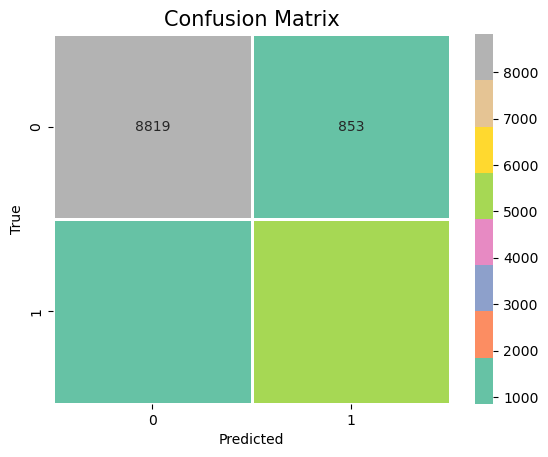

[[8819  853]
 [1363 5286]]


In [7]:
#confusion matrix 
cm=confusion_matrix(y_test,predict_sentiment)
class_label = [0, 1]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm,annot=True,cmap='Set2',linewidths=2,fmt='d')
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
print(cm)

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
ytest = np.array(y_test)
print(classification_report(ytest,lr_model.predict(X_test)))

              precision    recall  f1-score   support

           1       0.87      0.91      0.89      9672
           5       0.86      0.80      0.83      6649

    accuracy                           0.86     16321
   macro avg       0.86      0.85      0.86     16321
weighted avg       0.86      0.86      0.86     16321



In [37]:
# using the SVC for the model 
from sklearn.svm import SVC

svc= SVC()

vectorizer = TfidfVectorizer()
X = df1['cleaned']
Y = df1['score']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15,random_state=1) #Splitting dataset


# #Creating Pipeline
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=2000)),
                     ('clf', SVC(kernel='linear'))])

# #Training model
svc_model = pipeline.fit(X_train, y_train)

In [38]:
#Accuracy
from sklearn.metrics import accuracy_score
predict_sentiment = svc_model.predict(X_test)

print(accuracy_score(y_test,predict_sentiment))

0.8687580417866553


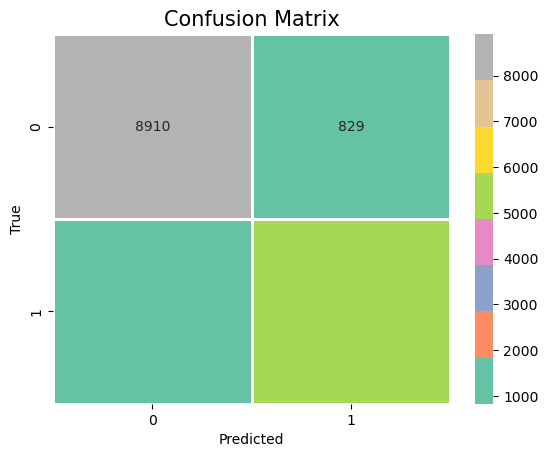

[[8910  829]
 [1313 5269]]


In [39]:
#confusion matrix 
cm=confusion_matrix(y_test,predict_sentiment)
class_label = [0, 1]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm,annot=True,cmap='Set2',linewidths=2,fmt='d')
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
print(cm)

In [8]:
# using the Naive_bayes for the model 
from sklearn.naive_bayes import MultinomialNB

naive_bayes = MultinomialNB()

vectorizer = TfidfVectorizer()
X = df1['cleaned']
Y = df1['score']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15,random_state=1) #Splitting dataset


# #Creating Pipeline
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=2000)),
                     ('clf', MultinomialNB())])

# #Training model
model = pipeline.fit(X_train, y_train)

In [19]:
#Accuracy
from sklearn.metrics import accuracy_score
predict_sentiment = model.predict(X_test)

print(accuracy_score(y_test,predict_sentiment))

0.8425341584461736


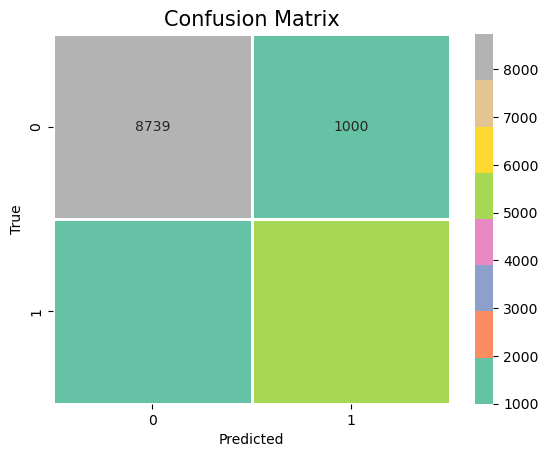

[[8739 1000]
 [1570 5012]]


In [20]:
#confusion matrix 
cm=confusion_matrix(y_test,predict_sentiment)
class_label = [0, 1]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm,annot=True,cmap='Set2',linewidths=2,fmt='d')
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
print(cm)

In [21]:
ytest = np.array(y_test)
print(classification_report(ytest,model.predict(X_test)))

              precision    recall  f1-score   support

           1       0.85      0.90      0.87      9739
           5       0.83      0.76      0.80      6582

    accuracy                           0.84     16321
   macro avg       0.84      0.83      0.83     16321
weighted avg       0.84      0.84      0.84     16321



In [29]:
# using the RandomForestClassifier for the model 
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()

vectorizer = TfidfVectorizer()
X = df1['cleaned']
Y = df1['score']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15,random_state=1) #Splitting dataset


# #Creating Pipeline
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=2000)),
                     ('clf', RandomForestClassifier(n_estimators=100,max_depth=100, random_state=7))])

# #Training model
random_forest = pipeline.fit(X_train, y_train)

In [30]:
#Accuracy
from sklearn.metrics import accuracy_score
predict_sentiment = random_forest.predict(X_test)

print(accuracy_score(y_test,predict_sentiment))

0.8501317321242571


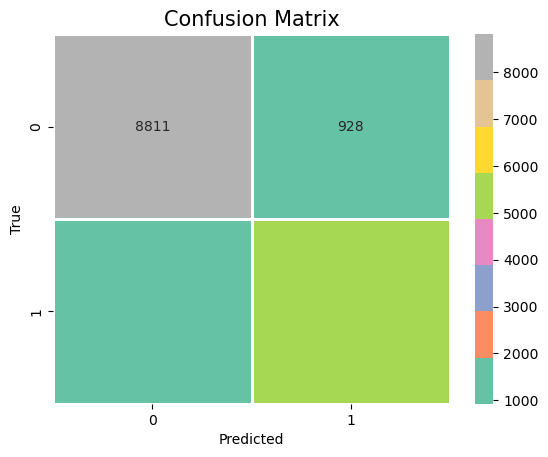

[[8811  928]
 [1518 5064]]


In [31]:
#confusion matrix 
cm=confusion_matrix(y_test,predict_sentiment)
class_label = [0, 1]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm,annot=True,cmap='Set2',linewidths=2,fmt='d')
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
print(cm)

In [32]:
ytest = np.array(y_test)
print(classification_report(ytest,model.predict(X_test)))

              precision    recall  f1-score   support

           1       0.75      0.96      0.84      9739
           5       0.89      0.52      0.66      6582

    accuracy                           0.78     16321
   macro avg       0.82      0.74      0.75     16321
weighted avg       0.81      0.78      0.77     16321



In [33]:
# using the GradientBoostingClassifier for the model 
from sklearn.ensemble import GradientBoostingClassifier

Grad_boost = GradientBoostingClassifier()

vectorizer = TfidfVectorizer()
X = df1['cleaned']
Y = df1['score']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15,random_state=1) #Splitting dataset


# #Creating Pipeline
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=2000)),
                     ('clf', GradientBoostingClassifier(n_estimators=100))])

# #Training model
Gradient_boosting = pipeline.fit(X_train, y_train)

In [34]:
#Accuracy
from sklearn.metrics import accuracy_score
predict_sentiment = Gradient_boosting.predict(X_test)

print(accuracy_score(y_test,predict_sentiment))

0.825010722382207


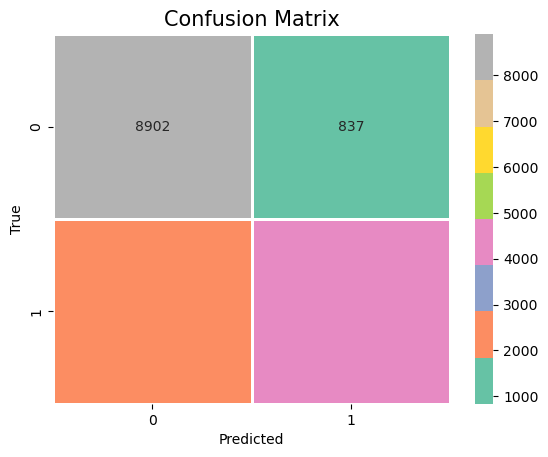

[[8902  837]
 [2019 4563]]


In [35]:
#confusion matrix 
cm=confusion_matrix(y_test,predict_sentiment)
class_label = [0, 1]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm,annot=True,cmap='Set2',linewidths=2,fmt='d')
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
print(cm)

In [36]:
ytest = np.array(y_test)
print(classification_report(ytest,model.predict(X_test)))

              precision    recall  f1-score   support

           1       0.75      0.96      0.84      9739
           5       0.89      0.52      0.66      6582

    accuracy                           0.78     16321
   macro avg       0.82      0.74      0.75     16321
weighted avg       0.81      0.78      0.77     16321



In [54]:
import pickle as pk

#to save model
filename = 'Netflix_review.pickle'
pk.dump(lr_model, open(filename, 'wb'))

In [5]:
# Load the model
filename = 'Netflix_review.pickle'
with open(filename, 'rb') as file:
    model = pk.load(file)

In [23]:
#Accuracy
from sklearn.metrics import accuracy_score

df2 = df1.iloc[1:20]
df2

,score,cleaned
6345,5,movi and seri are alright but the anim categor...
44311,5,netflix is my happi time awesom download featu...
14187,1,plagu with download issu download multipl thin...
6385,5,don t get me wrong i love thi app i love the v...
37260,1,app doesn t work i instal again and again it s...
6784,1,i mainli use thi app on a tcl tablet and it wo...
56973,1,i can t open the app despit restart the devic ...
106830,1,hdr not show on hdr support pc and mobil devic
23568,1,after recent updat on my applic is not work an...
43734,1,it lag in new devic work good in android


In [25]:
p_test = df2['cleaned']

In [49]:

result = model.predict(["""movi and seri are alright but the anim categori is realli dri i know they re work on it but we d realli love to see a larger anim catalog also thi is a recommend featur it would be great if you could share movi across your devic if your amount support multipl devic for instanc i download a movi on my phone but i want to watch it on my tablet instead of redownload just share the movi to the tab don t know if it s possibl but if would be a realli nice featur
"""])
print(result[0])

5


In [50]:
comment = input()

df = pd.DataFrame({'cleaned':[comment]})
        
output = model.predict(df['cleaned'])

print(output)
if output == '5':
    print("Positive Review")
else:
    print("Negative Review")

movi and seri are alright but the anim categori is realli dri i know they re work on it but we d realli love to see a larger anim catalog also thi is a recommend featur it would be great if you could share movi across your devic if your amount support multipl devic for instanc i download a movi on my phone but i want to watch it on my tablet instead of redownload just share the movi to the tab don t know if it s possibl but if would be a realli nice featur
['5']
Positive Review
